# PROJECT KCB AI

> Anggota Kelompok :
> - 201401032 - Al Imamul Luthfi
> - 201401033 - Albertman Putra Barasa
> - 201401034 - Alex Mario Simanjuntak
> - 201401040 - Avin Chaili Salim
> - 201401042 - Brian Wijaya
> - 201401022 - Farhan Doli Fadhiil Siagian


## STUDENT DROPOUT & GRADUATED PREDICTION

In [1]:
# import all necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk split
from sklearn.model_selection import train_test_split

#library untuk feature selection
from sklearn.ensemble import ExtraTreesClassifier

# import library untuk encoder
from sklearn.preprocessing import LabelEncoder

# import library untuk scaling
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

dataset : https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Pertama tama kita load datasetnya

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1azPPugLv7xt4IpQTOwCFztSKVpbkfD_g", delimiter = ";")

Cek info dari df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Tampilkan 5 data teratas

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Tampilkan 5 data terbawah

In [5]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


## PREPROCESSING

Cek infonya lagi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Cek jumlah null values / missing valuesnya

In [7]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

> Bisa dilihat diatas, bahwa tidak ada missing & Null values

Selanjutnya kita perbaiki nama kolom

In [8]:
df = df.rename(columns = {"Nacionality" : "Nationality"})

Menampilkan unique value dari Target

In [9]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

> Karena kita ingin predict dropout atau graduate, maka data "Enrolled" akan kita hapus karena tidak relevan.

In [10]:
df = df.drop(df[df['Target']=='Enrolled'].index)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Cek proporsi target

In [11]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

Bisa dilihat diatas terdapat total data Graduate sebanyak 2209, dan Droupout sebanyak 1421

> Kelompokkan data numerical dan categoricalnya.

In [12]:
df_cat = df.select_dtypes(['object']) #kategorik
df_num = df.drop(columns = df_cat.columns) #numerik

tampilkan 5 data teratas untuk df_cat

In [13]:
df_cat.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


tampilkan 5 data teratas untuk df_num

In [14]:
df_num.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


### DETECTING & HANDLING OUTLIERS

> Kita cek outliersnya

Tampilkan kolom kolomnya

In [15]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

> Kita akan cek outlier pada nilai kontinu saja.

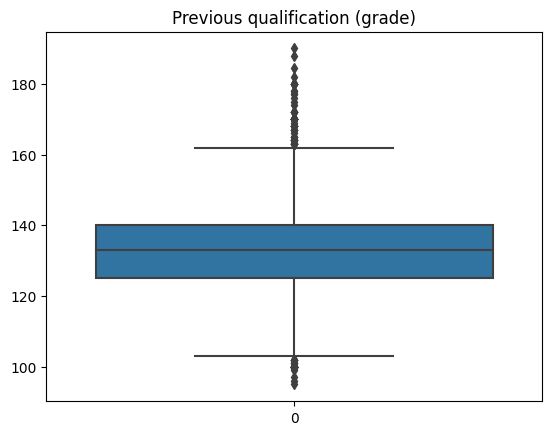

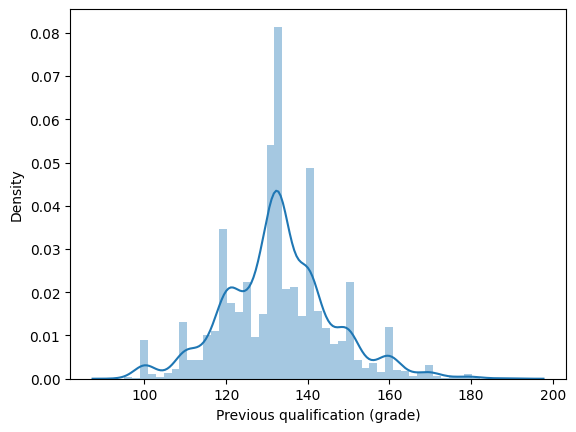

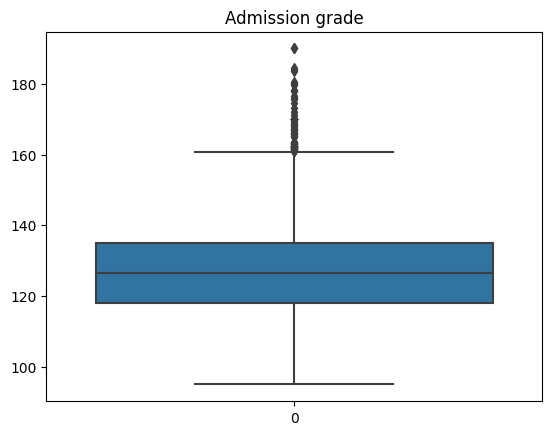

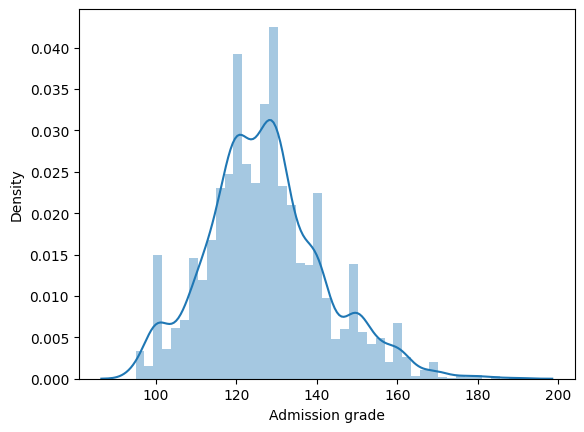

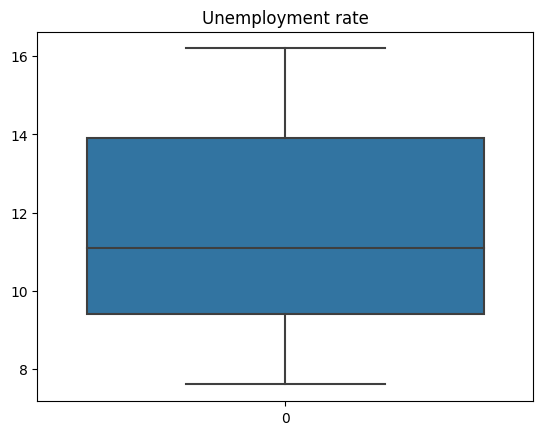

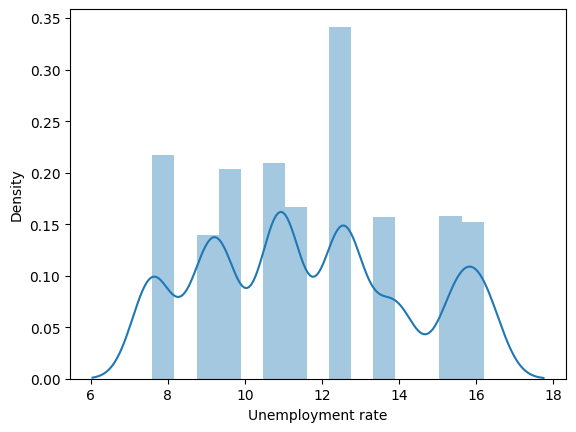

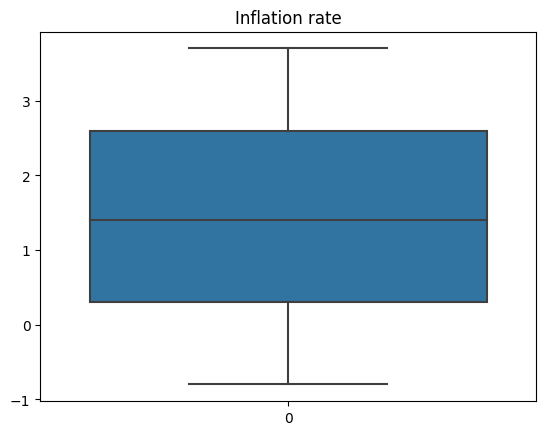

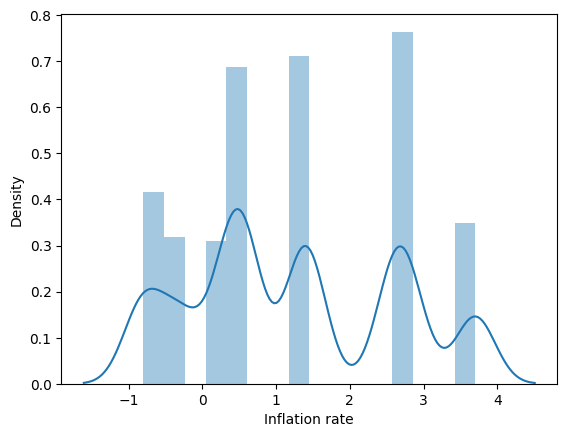

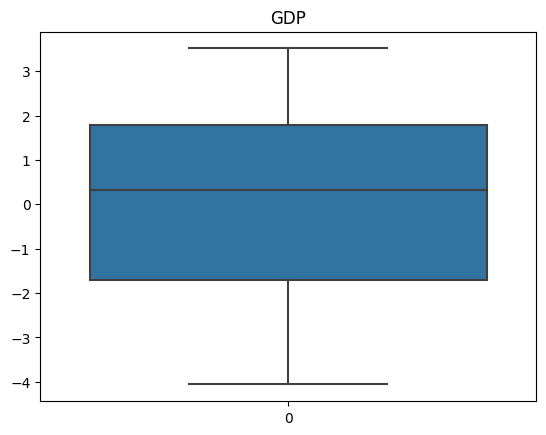

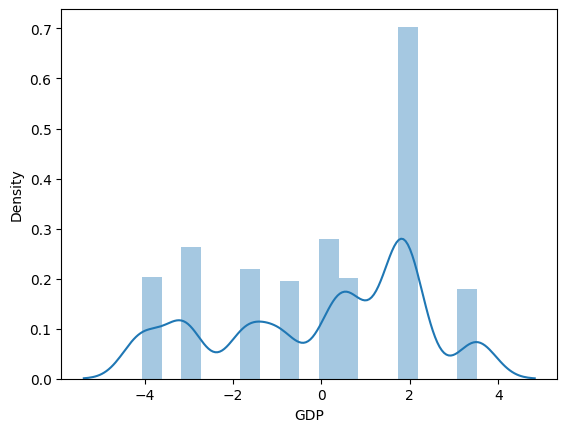

In [16]:
for i in df[["Previous qualification (grade)", "Admission grade", "Unemployment rate", "Inflation rate", "GDP"]]:
    plt.title(i)
    sns.boxplot(df_num[i])
    plt.show()
    sns.distplot(df_num[i])
    plt.show()

> Data terlihat masih aman, tidak terdistribusi dengan normal, dan tidak terlihat adanya outliers / nilai extreme.

## Feature Engineering

### Feature Encoding

> Kita akan encode targetnya menggunakan label encoder

Label_Encoder digunakan untuk variabel target

In [17]:
label_encoder = LabelEncoder()

In [18]:
df_cat["Target"] = label_encoder.fit_transform(df_cat["Target"])

In [19]:
df_cat.head()

,Target
0,0
1,1
2,0
3,1
4,1


Kita cek 0 dan 1 mengacu kemana

In [20]:
list(label_encoder.classes_)

['Dropout', 'Graduate']

Bisa dilihat diatas, bahwa 0 = Dropout dan 1 = Graduate

### Feature Scaling

> Disini kami akan melakukan scaling pada data kontinu
> Data tidak terdistribusi normal & tidak terlihat adanya outliers. <br>
> Karena data tidak terdistribusi dengan normal, maka kita mengggunakan MinMaxScaler().

In [21]:
# min max scaler
scaler = MinMaxScaler()

In [22]:
column_name = ["Previous qualification (grade)", "Admission grade", "Unemployment rate", "Inflation rate", "GDP"]

In [23]:
for i in column_name:
    df_num[i] = scaler.fit_transform(df_num[[i]])

In [24]:
df_num[column_name].head()

,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP
0,0.284211,0.340000,0.372093,0.488889,0.766182
1,0.684211,0.500000,0.732558,0.111111,0.640687
2,0.284211,0.313684,0.372093,0.488889,0.766182
3,0.284211,0.258947,0.209302,0.000000,0.124174
4,0.052632,0.489474,0.732558,0.111111,0.640687


### Feature Selection

Gabungkan data numerikal dan kategorikal tadi

In [25]:
df1 = pd.concat([df_num, df_cat], axis = 1)

In [26]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,0.284211,1,19,12,...,0,0,0,0,0.000000,0,0.372093,0.488889,0.766182,0
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0,6,6,6,13.666667,0,0.732558,0.111111,0.640687,1
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0,6,0,0,0.000000,0,0.372093,0.488889,0.766182,0
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0,6,10,5,12.400000,0,0.209302,0.000000,0.124174,1
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0,6,6,6,13.000000,0,0.732558,0.111111,0.640687,1


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nationality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

#### EMBEDDED METHOD (FEATURE IMPORTANCES)

Kita menggunakan Embedded Method, dimana metode ini akan mencari nilai untuk masing masing feature berdasarkan nilai kepentingannya dengan menggunakan bantuan dari model ExtraTreeClassifier()

In [28]:
# split dependent dan independent (target)
X = df1.drop(columns=["Target"])# independent feature, non target
y = df1["Target"] # target

In [29]:
# embedded method dengan ExtraTree
model = ExtraTreesClassifier()
model.fit(X,y) # fit model
print(model.feature_importances_) # gunakan inbuilt class: feature_importances

[0.00440363 0.02522061 0.01206418 0.02548502 0.00416678 0.00575179
 0.01802937 0.00224477 0.01565326 0.01528468 0.0153846  0.01659552
 0.01912982 0.01000209 0.00143651 0.02740253 0.09231879 0.02210412
 0.03755217 0.02091337 0.00212562 0.00796056 0.01923956 0.02269827
 0.07613616 0.07887858 0.00528647 0.00675415 0.01923315 0.02733346
 0.13732501 0.1549927  0.00597415 0.01552205 0.01471218 0.01468429]


In [30]:
# hasil feature importances
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

In [31]:
feat_importances.nlargest(36)

Curricular units 2nd sem (grade)                  0.154993
Curricular units 2nd sem (approved)               0.137325
Tuition fees up to date                           0.092319
Curricular units 1st sem (grade)                  0.078879
Curricular units 1st sem (approved)               0.076136
Scholarship holder                                0.037552
Debtor                                            0.027403
Curricular units 2nd sem (evaluations)            0.027333
Course                                            0.025485
Application mode                                  0.025221
Curricular units 1st sem (evaluations)            0.022698
Gender                                            0.022104
Age at enrollment                                 0.020913
Curricular units 1st sem (enrolled)               0.019240
Curricular units 2nd sem (enrolled)               0.019233
Admission grade                                   0.019130
Previous qualification (grade)                    0.0180

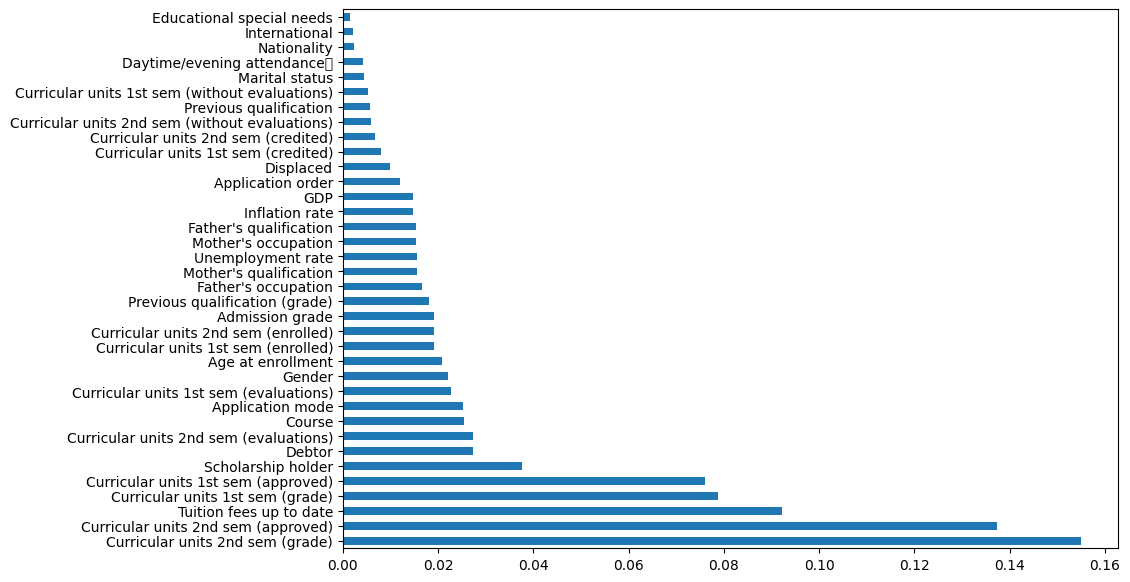

In [32]:
# plot hasil feature importances
plt.figure(figsize = (10,7))
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

Disini kita akan mengambil 8 Feature yg memiliki nilai Importance tertinggi, lalu memasukkan kedalam dataframe baru.

In [33]:
# masukkan hasil kedalam dataframe baru.
col = feat_importances.nlargest(8).index.tolist()

col.append("Target")

df_new = df1[col]

In [34]:
df_new.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Target
0,0.000000,0,1,0.000000,0,0,0,0,0
1,13.666667,6,0,14.000000,6,0,0,6,1
2,0.000000,0,0,0.000000,0,0,0,0,0
3,12.400000,5,1,13.428571,6,0,0,10,1
4,13.000000,6,1,12.333333,5,0,0,6,1


## MODELING

Import library untuk modeling

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

Masukkan nilainya kedalam variabel dataset.

In [36]:
dataset = df_new.values
dataset

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [13.66666667,  6.        ,  0.        , ...,  0.        ,
         6.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [13.5       ,  1.        ,  1.        , ...,  0.        ,
         9.        ,  0.        ],
       [12.        ,  5.        ,  1.        , ...,  0.        ,
         6.        ,  1.        ],
       [13.        ,  6.        ,  1.        , ...,  0.        ,
         6.        ,  1.        ]])

In [37]:
# split target variable
X = dataset[:, 0:8] # variabel bebas / independen
y = dataset[:, 8] # target variable

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [39]:
model = Sequential([
  Dense(10, activation='relu', input_shape=(8,)),
  Dense(10, activation='relu'), # relu digunakan agar bilangan tidak negatif, ReLU(x) = max(0, x), jika ada nilai negative, akan dijadikan 0
  Dense(1, activation='sigmoid'), # sigmoid dipakai untuk binary classification
])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['binary_accuracy'])

Training datanya kemudian masukkan kedalam variabel h

In [40]:
h = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
91/91 [==============================] - 2s 4ms/step - loss: 0.5829 - binary_accuracy: 0.7676
Epoch 2/150
91/91 [==============================] - 0s 4ms/step - loss: 0.3922 - binary_accuracy: 0.8499
Epoch 3/150
91/91 [==============================] - 0s 2ms/step - loss: 0.3597 - binary_accuracy: 0.8654
Epoch 4/150
91/91 [==============================] - 0s 4ms/step - loss: 0.3506 - binary_accuracy: 0.8691
Epoch 5/150
91/91 [==============================] - 0s 3ms/step - loss: 0.3390 - binary_accuracy: 0.8702
Epoch 6/150
91/91 [==============================] - 0s 3ms/step - loss: 0.3339 - binary_accuracy: 0.8691
Epoch 7/150
91/91 [==============================] - 0s 2ms/step - loss: 0.3262 - binary_accuracy: 0.8791
Epoch 8/150
91/91 [==============================] - 0s 3ms/step - loss: 0.3330 - binary_accuracy: 0.8733
Epoch 9/150
91/91 [==============================] - 0s 3ms/step - loss: 0.3201 - binary_accuracy: 0.8798
Epoch 10/150
91/91 [==========================

In [41]:
# buat ypredict
y_pred = model.predict(X_test)

23/23 [==============================] - 0s 1ms/step


In [42]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

Tampilkan Hasil

In [43]:
result.head()

,y_act,y_pred
0,1.0,0.951051
1,1.0,0.900118
2,0.0,0.062075
3,1.0,0.968797
4,1.0,0.930614


## Model Evaluation

In [44]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.2907 - binary_accuracy: 0.8926


[0.2906618118286133, 0.8925619721412659]

Pada data diatas, kita bisa melihat nilai Loss dan Accuracy dari Testing Model

Selanjutnya kita plot Accuracy dan Lossnya

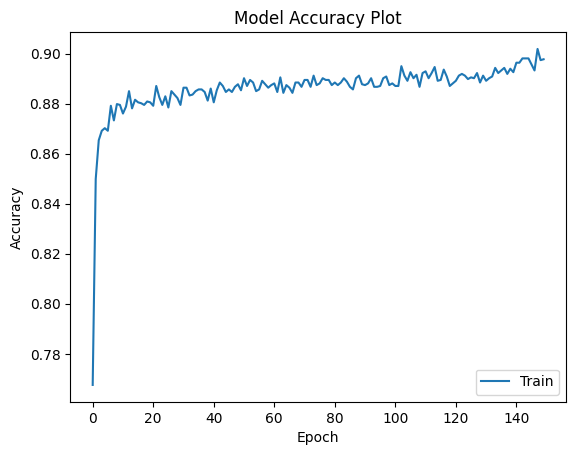

In [45]:
plt.plot(h.history['binary_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

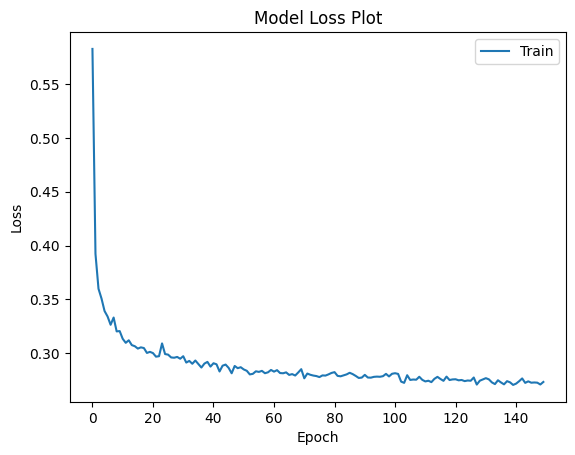

In [46]:
plt.plot(h.history['loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()